In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


#Generate data

In [3]:
import random
lstX = []
lstY = []
for x in range(-100, 100, 5):
  lstX.append([x])
  y = 3*x + random.uniform(0, 1)*100
  lstY.append([y])

In [4]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(40, 1) (40, 1)


In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY_hat.shape, testY_hat.shape)

(32, 1) (8, 1) (32, 1) (8, 1)


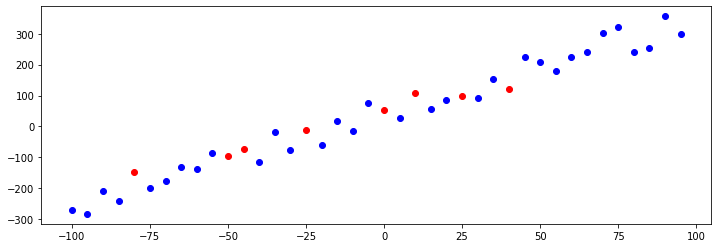

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.scatter(trainX, trainY_hat, color = "blue")
plt.scatter(testX, testY_hat, color = "red")
plt.show()

# Build NN with dropout

In [7]:
import torch.nn as nn

In [8]:
MyNet = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


In [9]:
from torchsummary import summary
summary(MyNet, input_size=(10, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 10, 100]             200
              ReLU-2              [-1, 10, 100]               0
            Linear-3               [-1, 10, 50]           5,050
              ReLU-4               [-1, 10, 50]               0
            Linear-5                [-1, 10, 1]              51
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.02
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [10]:
loss_func = torch.nn.MSELoss()

In [11]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

#Practice drop out

In [12]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)

In [21]:
Layer1 = MyNet[0]
Layer2to4 = MyNet[1:5]
print("Layer1 = ", Layer1)
print("Layer2to4", Layer2to4)

Layer1 =  Linear(in_features=1, out_features=100, bias=True)
Layer2to4 Sequential(
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


In [22]:
dropout25 = nn.Dropout(0.25)

In [26]:
Out1 = Layer1(tensorX)
print(Out1.shape, Out1)

torch.Size([32, 100]) tensor([[  2.8525,  -2.3499,  -6.3839,  ...,  -0.5655,  -3.2396,   5.5029],
        [-10.8875,   6.5708,  24.9844,  ...,   0.8538,  13.7418, -25.1459],
        [ -8.3893,   4.9488,  19.2811,  ...,   0.5957,  10.6542, -19.5734],
        ...,
        [-22.1294,  13.8695,  50.6494,  ...,   2.0150,  27.6356, -50.2223],
        [ 21.5889, -14.5146, -49.1588,  ...,  -2.5008, -26.3961,  47.2968],
        [ 25.3362, -16.9475, -57.7138,  ...,  -2.8879, -31.0273,  55.6556]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [27]:
Out1 = dropout25(Out1)
print(Out1.shape, Out1)

torch.Size([32, 100]) tensor([[  0.0000,  -3.1333,  -8.5118,  ...,   0.0000,   0.0000,   7.3373],
        [-14.5167,   8.7610,  33.3126,  ...,   1.1383,   0.0000, -33.5279],
        [  0.0000,   6.5984,  25.7081,  ...,   0.7943,   0.0000, -26.0979],
        ...,
        [-29.5058,   0.0000,  67.5325,  ...,   2.6866,  36.8475, -66.9630],
        [  0.0000, -19.3528, -65.5451,  ...,  -3.3345, -35.1947,   0.0000],
        [ 33.7816, -22.5966,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],
       device='cuda:0', grad_fn=<FusedDropoutBackward>)


# Train N epoches with drop out

In [28]:
lossLst = []
for epoch in range(1, 500):
    Out1 = Layer1(tensorX)
    Out1 = dropout25(Out1)
    tensorY = Layer2to4(Out1)
    loss = loss_func(tensorY_hat, tensorY)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

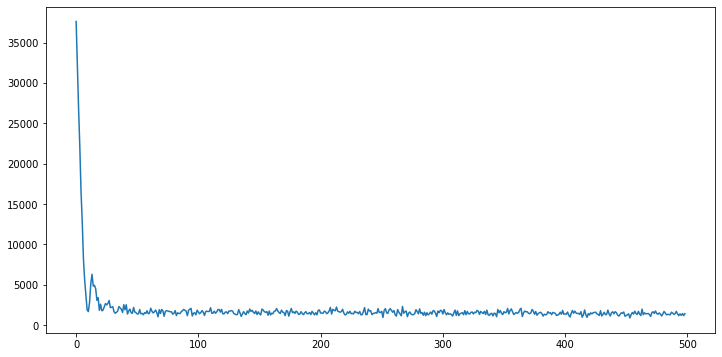

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

#Modify the weights of the trained NN

##Training data performance

In [ ]:
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

612.99


In [ ]:
trainY = tensorY.detach().cpu().numpy()

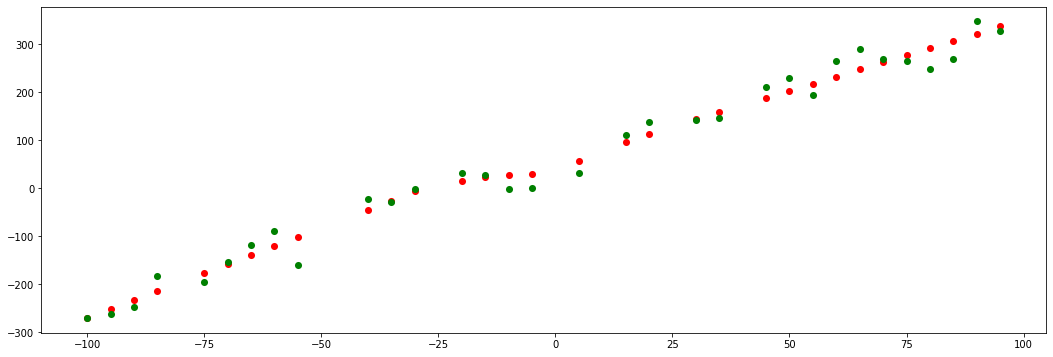

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(trainX, trainY, s=50, lw=0, color="red")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="green")
plt.show()

# Test 

In [ ]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY_hat = torch.FloatTensor(testY_hat).to(device)
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

1701.62


In [ ]:
testY = tensorY.detach().cpu().numpy()

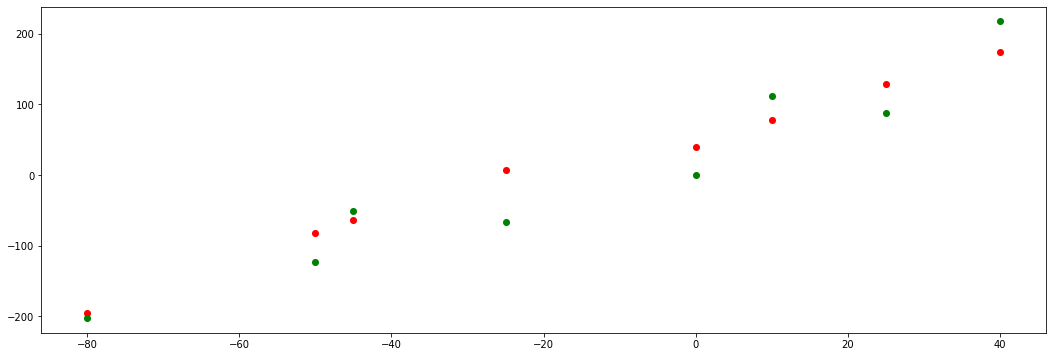

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(testX, testY, s=50, lw=0, color="red")
plt.scatter(testX, testY_hat, s=50, lw=0, color="green")
plt.show()